# Importing Libraries
 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr

# Loading and Exploring Dataset

In [2]:
df = pd.read_csv("C:/Users/Asus/Desktop/Forage/QUANTIUM DA VIRTUAL INTERNSHIP/QVI_data.csv")

print(df.head())  # Display the first few rows of the DataFrame

print(df.describe())  # Display basic statistics of the data

print(df.info())  # Check data types and missing values

   LYLTY_CARD_NBR        DATE  STORE_NBR  TXN_ID  PROD_NBR  \
0            1000  10/17/2018          1       1         5   
1            1002   9/16/2018          1       2        58   
2            1003    3/7/2019          1       3        52   
3            1003    3/8/2019          1       4       106   
4            1004   11/2/2018          1       5        96   

                                PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0  Natural Chip        Compny SeaSalt175g         2        6.0        175   
1   Red Rock Deli Chikn&Garlic Aioli 150g         1        2.7        150   
2   Grain Waves Sour    Cream&Chives 210G         1        3.6        210   
3  Natural ChipCo      Hony Soy Chckn175g         1        3.0        175   
4          WW Original Stacked Chips 160g         1        1.9        160   

        BRAND              LIFESTAGE PREMIUM_CUSTOMER  
0     NATURAL  YOUNG SINGLES/COUPLES          Premium  
1         RRD  YOUNG SINGLES/COUPLES       Mainstrea

# Identifying and Handling Outliers

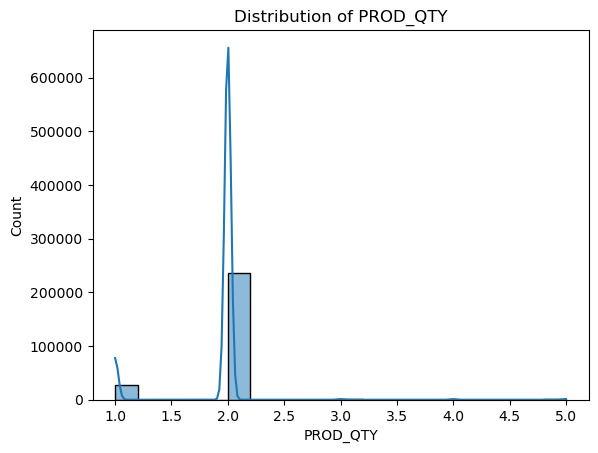

Outlier values:
315       4
332       3
523       4
952       5
1012      3
         ..
263285    3
263431    3
263668    3
263830    4
264269    4
Name: PROD_QTY, Length: 1277, dtype: int64


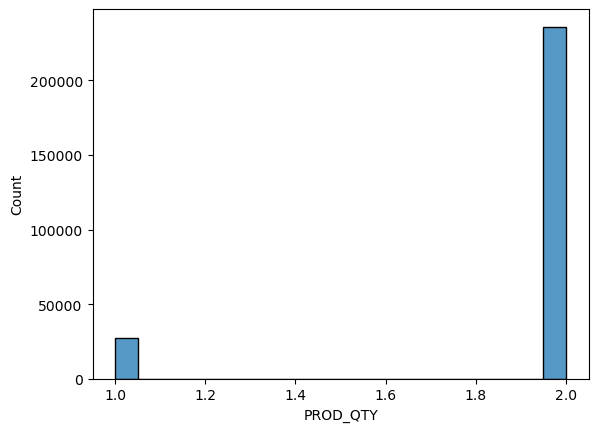

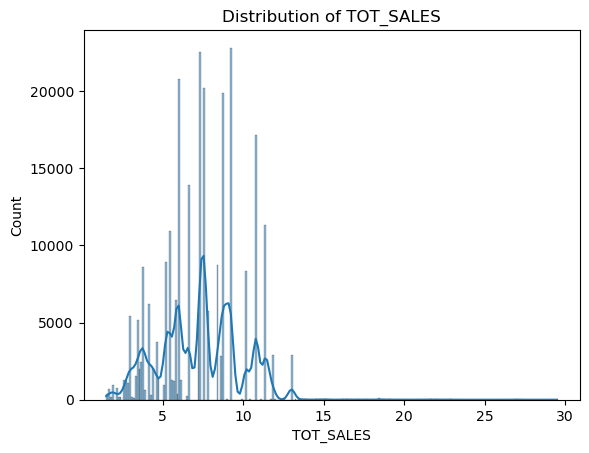

Outlier values:
315        7.6
332        6.3
523       10.4
952       15.0
1012      13.8
          ... 
263285     9.0
263431     8.1
263668    11.7
263830    10.8
264269    21.6
Name: TOT_SALES, Length: 1277, dtype: float64


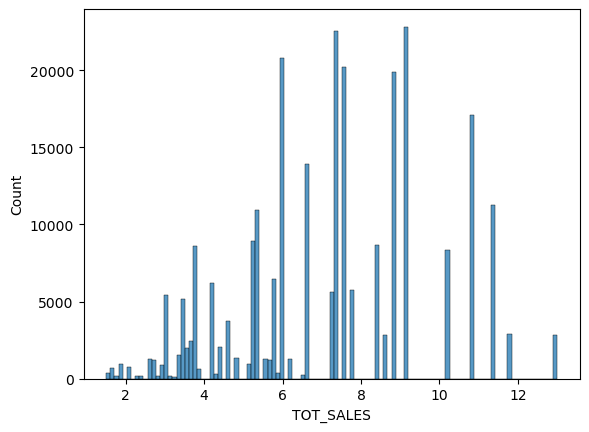

In [3]:
## Visualize the distribution of the variable of interest (e.g., 'spend')
sns.histplot(df['PROD_QTY'], kde=True)
plt.title('Distribution of PROD_QTY')
plt.show()

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df['PROD_QTY']))

# Define a threshold for identifying outliers (e.g., Z-score > 3)
outliers = (z_scores > 3)

# Identify and print the outliers
outlier_values = df['PROD_QTY'][outliers]
print("Outlier values:")
print(outlier_values)

# Remove outliers from the dataset
df_no_outliers = df[~outliers]

# Display the box plot after removing outliers for comparison
sns.histplot(x=df_no_outliers['PROD_QTY'])
plt.show()



## Visualize the distribution of the variable of interest (e.g., 'spend')
sns.histplot(df['TOT_SALES'], kde=True)
plt.title('Distribution of TOT_SALES')
plt.show()

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df['PROD_QTY']))

# Define a threshold for identifying outliers (e.g., Z-score > 3)
outliers = (z_scores > 3)

# Identify and print the outliers
outlier_values = df['TOT_SALES'][outliers]
print("Outlier values:")
print(outlier_values)

# Remove outliers from the dataset
df_no_outliers = df[~outliers]

# Display the box plot after removing outliers for comparison
sns.histplot(x=df_no_outliers['TOT_SALES'])
plt.show()


# Define Metrics

In [4]:
# Total number of customers
total_customers = df['LYLTY_CARD_NBR'].nunique()
print(f"Total number of customers: {total_customers}")
print()

# Average number of transactions per customer
average_transactions_per_customer = df.groupby('LYLTY_CARD_NBR')['TXN_ID'].nunique().mean()
print(f"Average number of transactions per customer: {average_transactions_per_customer:.2f}")
print()

# Total sales revenue
total_sales_revenue = df['TOT_SALES'].sum()
print(f"Total sales revenue: {total_sales_revenue:.2f}")
print()

# Total Spend per Customer
total_spend_per_customer = df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum()
df['total_spend_per_customer'] = total_spend_per_customer
print("Total Spend per Customer:")
print(total_spend_per_customer)
print()

# Average Spend per Customer
average_spend_per_customer = df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].mean()
df['average_spend_per_customer'] = average_spend_per_customer
print("Average Spend per Customer:")
print(average_spend_per_customer)
print()

# Frequency of Purchase
purchase_frequency = df.groupby('LYLTY_CARD_NBR').size()
df['purchase_frequency'] = purchase_frequency
print("Frequency of Purchase:")
print(purchase_frequency)
print()

# Average Pack Size per Customer
average_pack_size_per_customer = df.groupby('LYLTY_CARD_NBR')['PACK_SIZE'].mean()
df['average_pack_size_per_customer'] = average_pack_size_per_customer
print("Average Pack Size per Customer:")
print(average_pack_size_per_customer)
print()


Total number of customers: 72636

Average number of transactions per customer: 3.62

Total sales revenue: 1933115.00

Total Spend per Customer:
LYLTY_CARD_NBR
1000        6.0
1002        2.7
1003        6.6
1004        1.9
1005        2.8
           ... 
2370651    13.0
2370701     7.2
2370751     9.2
2370961    18.6
2373711    11.4
Name: TOT_SALES, Length: 72636, dtype: float64

Average Spend per Customer:
LYLTY_CARD_NBR
1000        6.0
1002        2.7
1003        3.3
1004        1.9
1005        2.8
           ... 
2370651    13.0
2370701     7.2
2370751     9.2
2370961     9.3
2373711    11.4
Name: TOT_SALES, Length: 72636, dtype: float64

Frequency of Purchase:
LYLTY_CARD_NBR
1000       1
1002       1
1003       2
1004       1
1005       1
          ..
2370651    1
2370701    1
2370751    1
2370961    2
2373711    1
Length: 72636, dtype: int64

Average Pack Size per Customer:
LYLTY_CARD_NBR
1000       175.0
1002       150.0
1003       192.5
1004       160.0
1005       165.0
        

# Function to calculate the correlation or magnitude distance

In [9]:
def calculate_distance(trial_store, control_store, measure="correlation"):
    trial_data = df[df['STORE_NBR'] == trial_store]
    control_data = df[df['STORE_NBR'] == control_store]

    if measure == "correlation":
        return np.corrcoef(trial_data['TOT_SALES'], control_data['TOT_SALES'])[0, 1]
    elif measure == "magnitude_distance":
        observed_distance = np.sum(np.abs(trial_data['TOT_SALES'] - control_data['TOT_SALES']))
        min_distance = np.sum(np.abs(df['TOT_SALES'] - control_data['TOT_SALES']))
        max_distance = np.sum(np.abs(df['TOT_SALES'] - df['TOT_SALES']))

        return 1 - (observed_distance - min_distance) / (max_distance - min_distance)

# Function to find control stores for a given trial store

In [8]:
def find_control_stores(trial_store, measure="correlation"):
    control_stores = set(df['STORE_NBR'].unique()) - {trial_store}

    distances = [calculate_distance(trial_store, control_store, measure) for control_store in control_stores]

    selected_control_store = control_stores[np.argmax(distances)]

    return selected_control_store

# Function to calculate a metric for comparing control stores to trial stores

In [7]:
# Define trial and control stores
trial_stores = [77, 86, 88]
control_stores = [store for store in df['STORE_NBR'].unique() if store not in trial_stores]

# Function to calculate similarity metric
def calculate_similarity_metric(trial_store, control_store, metric='pearson'):
    trial_data = df[df['STORE_NBR'] == trial_store].select_dtypes(include=np.number)
    control_data = df[df['STORE_NBR'] == control_store].select_dtypes(include=np.number)
    
    if metric == 'pearson':
        similarity_metric = trial_data.corrwith(control_data, axis=0, numeric_only=True)
    elif metric == 'magnitude_distance':
        # Implement your method for magnitude distance
        pass
    else:
        raise ValueError("Invalid metric. Choose 'pearson' or 'magnitude_distance'")
    
    return similarity_metric

# Function to select control stores
def select_control_stores(trial_store, control_stores, metric='pearson'):
    similarity_scores = []

    for control_store in control_stores:
        similarity_metric = calculate_similarity_metric(trial_store, control_store, metric)
        avg_similarity_score = np.mean(similarity_metric)
        similarity_scores.append((control_store, avg_similarity_score))
    
    sorted_control_stores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    return sorted_control_stores[0][0]

# Function to perform t-test and analyze impact
def analyze_trial_effect(trial_store, control_store):
    trial_data = df[df['STORE_NBR'] == trial_store]
    control_data = df[df['STORE_NBR'] == control_store]
    
    t_stat, p_value = ttest_ind(trial_data['TOT_SALES'], control_data['TOT_SALES'])
    
    if p_value < 0.05:
        print(f"Trial Store {trial_store} has a significant impact on total sales compared to Control Store {control_store}.")
    else:
        print(f"No significant impact on total sales observed between Trial Store {trial_store} and Control Store {control_store}.")

# Apply the functions for each trial store
for trial_store in trial_stores:
    selected_control_store = select_control_stores(trial_store, control_stores, metric='pearson')
    analyze_trial_effect(trial_store, selected_control_store)


Trial Store 77 has a significant impact on total sales compared to Control Store 1.
Trial Store 86 has a significant impact on total sales compared to Control Store 1.
Trial Store 88 has a significant impact on total sales compared to Control Store 1.
